In [ ]:
# run pip install -r requirements.txt in cmd/shell to install all dependencies

In [ ]:
# Q0: In classic 2 dimensional saper, a field can have up to 8 neighbouring bombs, and therefore display 8. What is the highest number that can be displayed in 4 dimensional saper?

In [ ]:
import torch
import plotly.express as px

# 1. Scalars

In [ ]:
torch.tensor(0)

In [ ]:
torch.tensor(1) + torch.tensor(1)

In [ ]:
torch.tensor(2) * torch.tensor(3)

In [ ]:
# Q1: How much will this be?
torch.tensor(2) + torch.tensor(2)

In [ ]:
torch.tensor(1).item()

# 2. Vectors

In [ ]:
vector = torch.tensor([1,2,3])
vector

In [ ]:
vector[0]

In [ ]:
vector.shape

In [ ]:
vector * torch.tensor([3, 4, 5])

In [ ]:
# Q2: How much will this be?
vector * vector

In [ ]:
vector * torch.tensor(3)

In [ ]:

price_beer = 4.50
price_drink = 33.0
price_kebab = 23.0

total = 4 * price_beer + 2 * price_drink + 1 * price_kebab
total

In [ ]:
pricing = torch.tensor([price_beer, price_drink, price_kebab])
consumption = torch.tensor([4.0, 2.0, 1.0])
pricing.matmul(consumption)

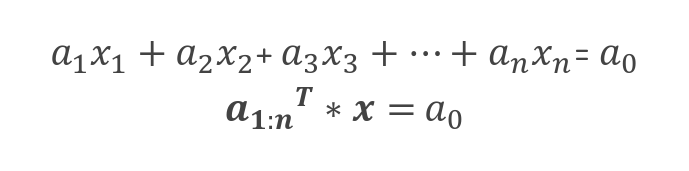

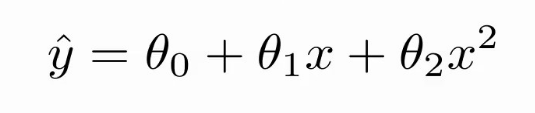

In [ ]:
O0, O1, O2 = 1, 2, 3
x = 2
x_pow = torch.full((3,), x).pow(torch.arange(3))
print(x_pow)
O_vect = torch.tensor([O0, O1, O2])
print(O_vect)
print(O_vect * x_pow)
(O_vect * x_pow).sum()

In [ ]:
O0 + O1 * x**1 + O2 * x**2

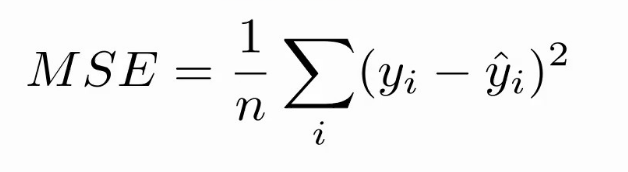

In [ ]:
n = 4
y = torch.tensor([4 ,1, 8, 5])
y_hat = torch.tensor([4, 2, 6, 5])

print(y)
print(y_hat)

In [ ]:
print(y - y_hat)
print((y-y_hat).pow(2))
print((y-y_hat).pow(2).sum())
print(1/n * (y - y_hat).pow(2).sum())

In [ ]:
# Raw python version:
total = 0
for i in range(n):
    diff = y[i] - y_hat[i]
    pow_2 = diff**2
    total = total + pow_2
    print(diff.item(), pow_2.item(), total.item())
total.item() / n

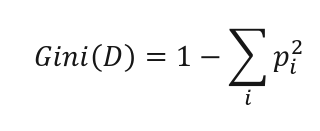

In [ ]:
# Q3: compute gini using pytorch and raw python

torch.manual_seed(42)
p = torch.rand(4)
print(p)

# gini_torch =

# gini_raw =

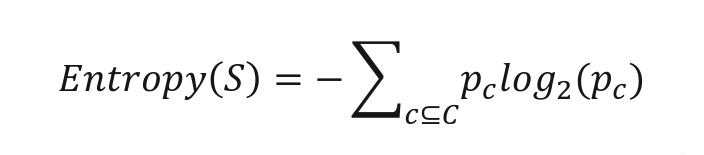

# 3. Matrices

In [ ]:
mat = torch.tensor(
    [
        [0, 1],
        [2, 3],
    ]
)
mat

In [ ]:
mat.shape

In [ ]:
mat.matmul(mat)

In [ ]:
# NOT matmul
mat * mat

In [ ]:
mat2 = torch.arange(6).reshape(3, 2)
mat2

In [ ]:
mat2.t()

In [ ]:
mat2[0]

In [ ]:
mat2[:, 0]

In [ ]:
# Won't work
# mat.matmul(mat2)

In [ ]:
# pytorch version
mat.matmul(mat2.t())

In [ ]:
mat2.t()

In [ ]:
# raw python version
mat_right = mat2.t()
mat_left = mat

assert mat_left.shape[1] == mat_right.shape[0]
new_mat = torch.zeros(mat_left.shape[0], mat_right.shape[1])

# for each row in mat1
for row_id in range(mat_left.shape[0]):

    # for each column in mat_left
    for column_id in range(mat_right.shape[1]):

        # for each item in both (since row of mat1 and col of mat_left are vectors of the same size)
        for item_id in range(mat_right.shape[0]):
            print(row_id, item_id, column_id)
            new_mat[row_id, column_id] += mat_left[row_id, item_id] * mat_right[item_id, column_id]

new_mat

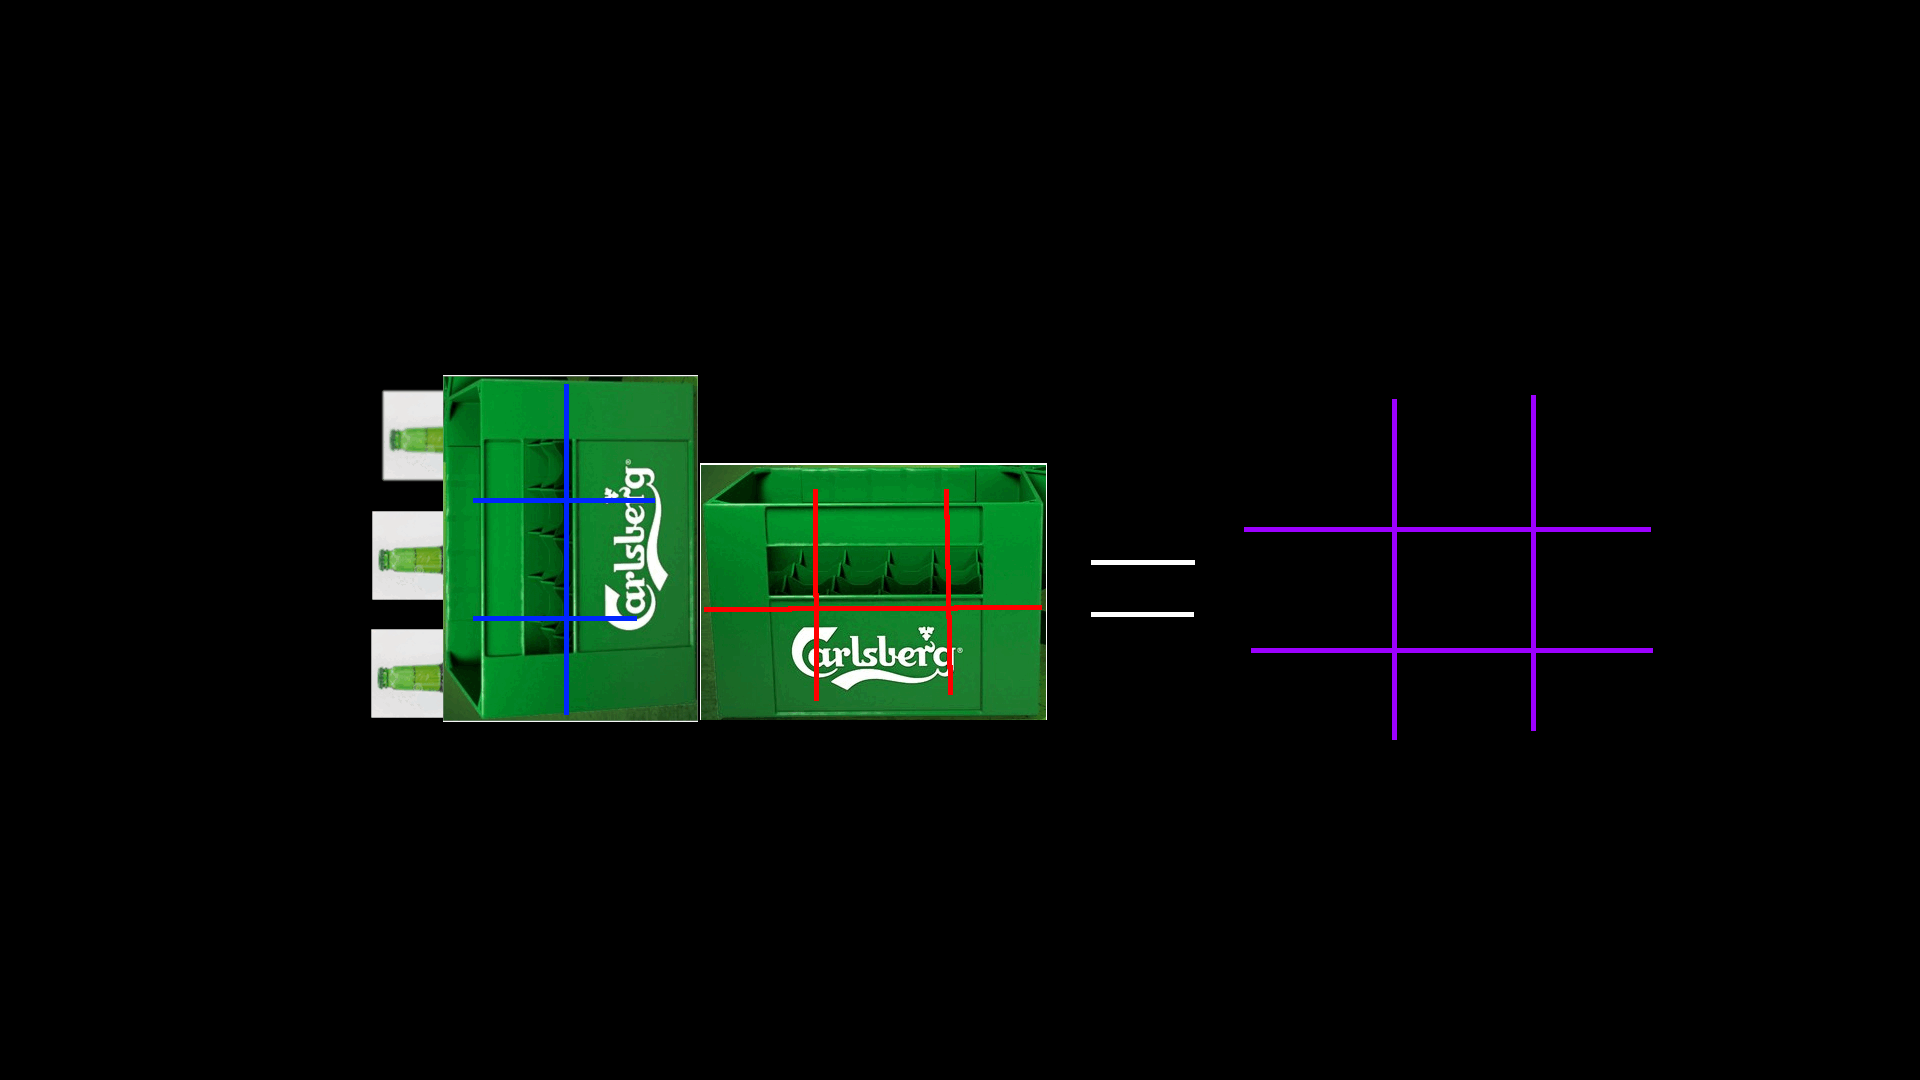

In [ ]:
# Q4: Which of those would be valid operations for any shape of matrix?
# a) matrix.matmul(matrix)
# b) matrix.matmul(matrix.t())
# c) matrix.t().matmul(matrix)
# d) matrix.t().matmul(matrix.t())

In [ ]:
data_vect = torch.tensor([[1, 1]]).type(torch.float32)

# Display code
fig = px.scatter(x=data_vect[:, 0], y=data_vect[:, 1])
fig.update_xaxes(range=[-2, 2])
fig.update_yaxes(range=[-2, 2])

In [ ]:
transform = torch.tensor([[1, 0.5], [0, 1]])
transformed_data_vect = data_vect.matmul(transform)

# Display code
fig = px.scatter(x=transformed_data_vect[:, 0], y=transformed_data_vect[:, 1])
fig.update_xaxes(range=[-2, 2])
fig.update_yaxes(range=[-2, 2])

In [ ]:
data_drawing = torch.tensor([[0.5, 0], [0.3, 1.5], [0.7, 1.5], [0.5, 0]])

# Display code
fig = px.line(x=data_drawing[:, 0], y=data_drawing[:, 1])
fig.update_xaxes(range=[-2, 2])
fig.update_yaxes(range=[-2, 2])

In [ ]:
transformed_data_drawing = data_drawing.matmul(transform)

# Display code
fig = px.line(x=transformed_data_drawing[:, 0], y=transformed_data_drawing[:, 1])
fig.update_xaxes(range=[-2, 2])
fig.update_yaxes(range=[-2, 2])

In [ ]:
data_drawing_3d = data_drawing.matmul(torch.tensor([[1, 0, 0.5], [0, 1, 0.5]]))

# Display code
fig = px.line_3d(
    x=data_drawing_3d[:, 0],
    y=data_drawing_3d[:, 1],
    z=data_drawing_3d[:, 2],
)
fig.update_layout(
    scene=dict(
        xaxis=dict(nticks=4, range=[-1, 2]),
        yaxis=dict(nticks=4, range=[-1, 2]),
        zaxis=dict(nticks=4, range=[-1, 2]),
    )
)

In [ ]:
torch.manual_seed(0)
data = torch.rand(2500, 2)
target = (data[:, 0] < 0.5) & (data[:, 1] < 0.5)

# Display code
px.scatter(x=data[:, 0], y=data[:, 1], color=target)

In [ ]:
data_aug = data.matmul(transform)
# data_aug = data.matmul(-transform)

# Display code
px.scatter(x=data_aug[:, 0], y=data_aug[:, 1], color=target)

In [ ]:
# 1. Rotate (matmul):
rotated = data.matmul(torch.tensor([[-1, 0.0], [0, -1],]))

# 2. Move to center (+b):
centered = rotated + torch.tensor([0.5, 0.5])

# 3. Wrap (activation function):
wrapped = torch.sigmoid(centered * 1000)

# 4. Reduce dimensionality (matmul):
one_dim = wrapped.matmul(torch.tensor([[0, 0.5], [0,0.5]]))

# 5. Move to center (+b)
centered2 = one_dim + torch.tensor([0, -0.75])

# 6. Split (activation function)
split = torch.sigmoid(centered2 * 1000)

# Display code
animated = torch.concat([data, rotated, centered, wrapped, one_dim, centered2, split, data], dim=0)
animated = torch.concat(
    [animated, torch.arange(animated.shape[0]).unsqueeze(1) // rotated.shape[0]], dim=1
)
target_animated = torch.concat([target for _ in range(animated.shape[0]//data.shape[0])])
fig = px.scatter(
    x=animated[:, 0],
    y=animated[:, 1],
    color=target_animated,
    animation_frame=animated[:, 2],
)
fig.update_xaxes(range=[-1.2, 1.2])
fig.update_yaxes(range=[-1.2, 1.2])

In [ ]:
x = torch.arange(-1, 1, 0.0001)
y = torch.sigmoid(x * 1000)

# Display code
fig = px.scatter(x=x, y=y)
fig.update_xaxes(range=[-1.2, 1.2])
fig.update_yaxes(range=[-0.2, 1.2])

# 4*. Tensors 

In [ ]:
# Display code
def dim_unravel_tensor(tensor: torch.Tensor):
    aranged = torch.arange(tensor.numel()).reshape(tensor.shape)
    return torch.stack(
        [
            (aranged.ravel() % prev_dim_size) // dim_size
            for dim_size, prev_dim_size in zip(
                list(aranged.stride()), [aranged.numel()] + list(aranged.stride())
            )
        ]
        + [tensor.ravel()],
        dim=1,
    )

In [ ]:
tensor = torch.arange(3 * 4 * 5).reshape((3, 4, 5))
tensor

In [ ]:
# Display code
df = dim_unravel_tensor(tensor)
fig = px.scatter_3d(x=df[:, 0], y=df[:, 1], z=df[:, 2], color=df[:, 3])
fig.update_scenes(xaxis_visible=False, yaxis_visible=False,zaxis_visible=False )

In [ ]:
# Display code
df = dim_unravel_tensor(torch.arange(6 * 5 * 4 * 3).reshape((6, 5, 4, 3)))
fig = px.scatter_3d(
    x=df[:, 3],
    y=df[:, 1],
    z=df[:, 2],
    color=df[:, -1],
    animation_frame=df[:, 0],
    color_continuous_midpoint=180,
)
fig.update_scenes(xaxis_visible=False, yaxis_visible=False, zaxis_visible=False)

In [ ]:
saper_board = torch.ones(3, 3, 3, 3)
saper_board[1,1,1,1] = 0
saper_board[1,1,1,1] = saper_board.sum()

# Display code
df = dim_unravel_tensor(saper_board)
fig = px.scatter_3d(
    x=df[:, 3],
    y=df[:, 1],
    z=df[:, 2],
    color=df[:, -1],
    animation_frame=df[:, 0],
    color_continuous_midpoint=40,
)
fig.update_scenes(xaxis_visible=False, yaxis_visible=False, zaxis_visible=False)

# Amazing explanations provided in those series:
- Linear algebra:
\
https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab

- ANN:
\
https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi